In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score,r2_score

In [3]:
FLT_1 = pd.read_excel('FLT 1 datasets.xlsx')
a = FLT_1.drop(columns='t(s)')
a

,aoa (deg),pitch (deg),pitch speed (deg/s),true speed (m/s),x acceleration (m/s2),z acceleration (m/s2),engine inclinataion (deg)
0,1.978644,1.994105,0.009835,50.741865,1.053801,-7.403692,5.139738
1,1.978343,1.994686,0.009787,50.742590,1.054149,-7.405721,5.139129
2,1.978041,1.995267,0.009738,50.743315,1.054484,-7.407809,5.138521
3,1.977740,1.995847,0.009690,50.744040,1.054807,-7.409959,5.137912
4,1.977439,1.996428,0.009642,50.744765,1.055118,-7.412167,5.137303
...,...,...,...,...,...,...,...
99995,2.391689,2.924688,-0.012253,50.285324,0.749623,-9.715756,5.044085
99996,2.391753,2.924688,-0.012253,50.285324,0.749756,-9.716056,5.044143
99997,2.391817,2.924688,-0.012253,50.285324,0.749889,-9.716355,5.044201
99998,2.391882,2.924688,-0.012253,50.285324,0.750021,-9.716652,5.044262


In [4]:
data = a['true speed (m/s)']
data

0        50.741865
1        50.742590
2        50.743315
3        50.744040
4        50.744765
           ...    
99995    50.285324
99996    50.285324
99997    50.285324
99998    50.285324
99999    50.285324
Name: true speed (m/s), Length: 100000, dtype: float64

In [6]:
len(data)

100000

In [5]:
x = data[0:(len(data)-1)].to_numpy()
y = data[1:len(data)].to_numpy()


In [8]:
x.shape

(99999,)

In [9]:
y.shape


(99999,)

In [10]:
x

array([50.74186482, 50.74258986, 50.7433149 , ..., 50.28532398,
       50.28532393, 50.28532389])

In [11]:
y

array([50.74258986, 50.7433149 , 50.74403992, ..., 50.28532393,
       50.28532389, 50.28532385])

In [12]:
np.squeeze(np.squeeze(x))

array([50.74186482, 50.74258986, 50.7433149 , ..., 50.28532398,
       50.28532393, 50.28532389])

In [13]:
FLT_1[0:len(FLT_1)-1]

,t(s),aoa (deg),pitch (deg),pitch speed (deg/s),true speed (m/s),Cd,Cl,Cm
0,0.00000,1.978644,1.994105,0.009835,50.741865,0.050988,0.460989,0.001941
1,0.00012,1.978343,1.994686,0.009787,50.742590,0.050972,0.461021,0.001953
2,0.00024,1.978041,1.995267,0.009738,50.743315,0.050956,0.461052,0.001966
3,0.00036,1.977740,1.995847,0.009690,50.744040,0.050941,0.461083,0.001978
4,0.00048,1.977439,1.996428,0.009642,50.744765,0.050925,0.461115,0.001990
...,...,...,...,...,...,...,...,...
99994,11.99928,2.391625,2.924688,-0.012253,50.285324,0.043427,0.417237,-0.004509
99995,11.99940,2.391689,2.924688,-0.012253,50.285324,0.043411,0.416994,-0.004519
99996,11.99952,2.391753,2.924688,-0.012253,50.285324,0.043395,0.416750,-0.004529
99997,11.99964,2.391817,2.924688,-0.012253,50.285324,0.043379,0.416508,-0.004539


In [7]:

# x = x_transpose
# y = y
initializers = keras.initializers.GlorotNormal()
model = keras.Sequential([
    keras.layers.Dense(1 , input_shape= (1,)),
    keras.layers.Dense(2 ,activation = "sigmoid"),
    keras.layers.Dense(1 ,activation = "linear",),
])
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile (optimizer=optimizer,
               loss = 'MSE',
               metrics = ['Accuracy']
               )

history = model.fit(x, y, epochs = 1000, batch_size=100)
model.summary()




Epoch 1/1000
1000/1000 [==============================] - 3s 2ms/step - loss: 2563.0884 - Accuracy: 0.0000e+00
Epoch 2/1000
1000/1000 [==============================] - 1s 1ms/step - loss: 2512.9109 - Accuracy: 0.0000e+00
Epoch 3/1000
1000/1000 [==============================] - 1s 1ms/step - loss: 2463.3643 - Accuracy: 0.0000e+00
Epoch 4/1000
1000/1000 [==============================] - 2s 2ms/step - loss: 2414.3896 - Accuracy: 0.0000e+00
Epoch 5/1000
1000/1000 [==============================] - 2s 2ms/step - loss: 2365.9546 - Accuracy: 0.0000e+00
Epoch 6/1000
1000/1000 [==============================] - 2s 2ms/step - loss: 2318.0356 - Accuracy: 0.0000e+00
Epoch 7/1000
1000/1000 [==============================] - 1s 1ms/step - loss: 2270.6182 - Accuracy: 0.0000e+00
Epoch 8/1000
1000/1000 [==============================] - 2s 2ms/step - loss: 2223.7021 - Accuracy: 0.0000e+00
Epoch 9/1000
1000/1000 [==============================] - 2s 2ms/step - loss: 2177.2830 - Accuracy: 0.0000e+00
E

KeyboardInterrupt: 

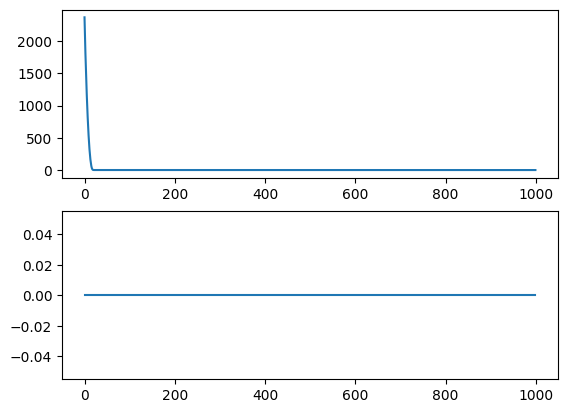

In [24]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'])
ax[1].plot(history.history['Accuracy'])

In [25]:
y_pred = model.predict(y)

3125/3125 [==============================] - 5s 1ms/step


In [26]:
print('R-square:',r2_score(data[:len(data)-1], y_pred))

R-square: 0.999341673874581


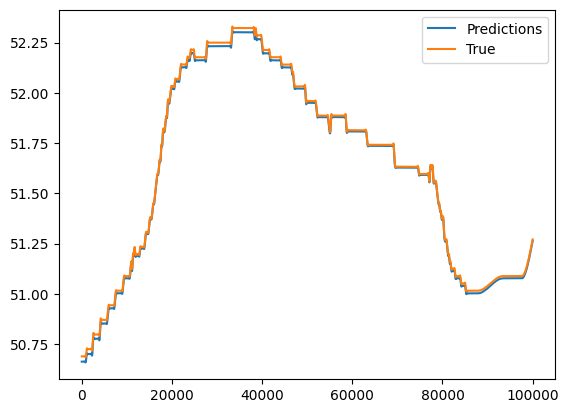

In [30]:

plt.plot (y_pred, label='Predictions')
plt.plot (data, label="True")

plt.legend()

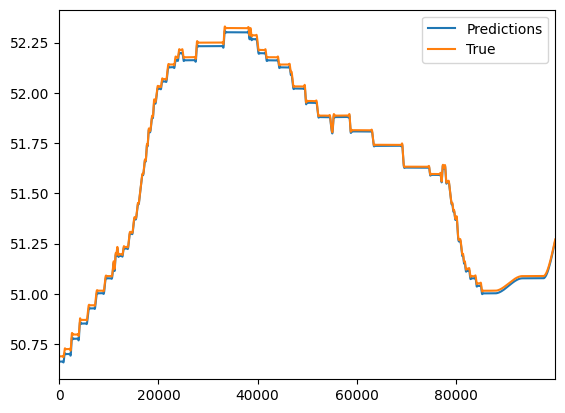

In [28]:
N_data = len(y_pred)
plt.plot (y_pred, label='Predictions')
plt.plot (data, label="True")
plt.xlim(0, N_data)
plt.legend()

In [ ]:
Cd2 = y_pred[:, 4]
Cd2

IndexError: index 4 is out of bounds for axis 1 with size 1

In [29]:
plt.figure()
plt.plot (FLT_1['Cd'])
plt.plot (Cd2)


KeyError: 'Cd'

<Figure size 640x480 with 0 Axes>